## **DATA ANALYSIS- BLINKIT**


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
data=pd.read_csv("BlinkIT-Grocery-Data.csv")

In [142]:
data

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [143]:
data.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [144]:
print(data["Item Fat Content"].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [146]:
data["Item Fat Content"]=data["Item Fat Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})

In [147]:
data['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [148]:
#Total sales
Total_sales=data['Sales'].sum()
print(f"Total_sales: ${Total_sales:,.1f}")

Total_sales: $1,201,681.5


In [149]:
#avg sales
Avg_sales=data['Sales'].mean()
Avg_sales

np.float64(140.99278338613163)

In [150]:
#No of items
No_items=data['Sales'].count()
No_items

np.int64(8523)

In [151]:
#Avg rating
Avg_rating=data['Rating'].mean()
Avg_rating

np.float64(3.965857092573038)

In [152]:
#By fat content
sales_by_fat=data.groupby("Item Fat Content")['Sales'].sum()
sales_by_fat

Item Fat Content
Low Fat    776319.6884
Regular    425361.8044
Name: Sales, dtype: float64

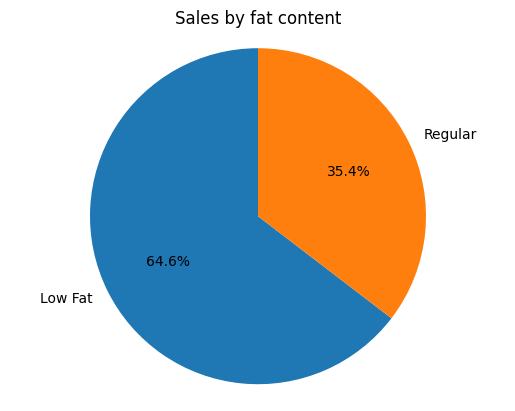

In [153]:
plt.pie(sales_by_fat,labels=sales_by_fat.index, autopct="%.1f%%", startangle=90)
plt.title('Sales by fat content')
plt.axis('equal')
plt.show()

In [154]:
#by Item Type
sales_by_type=data.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)

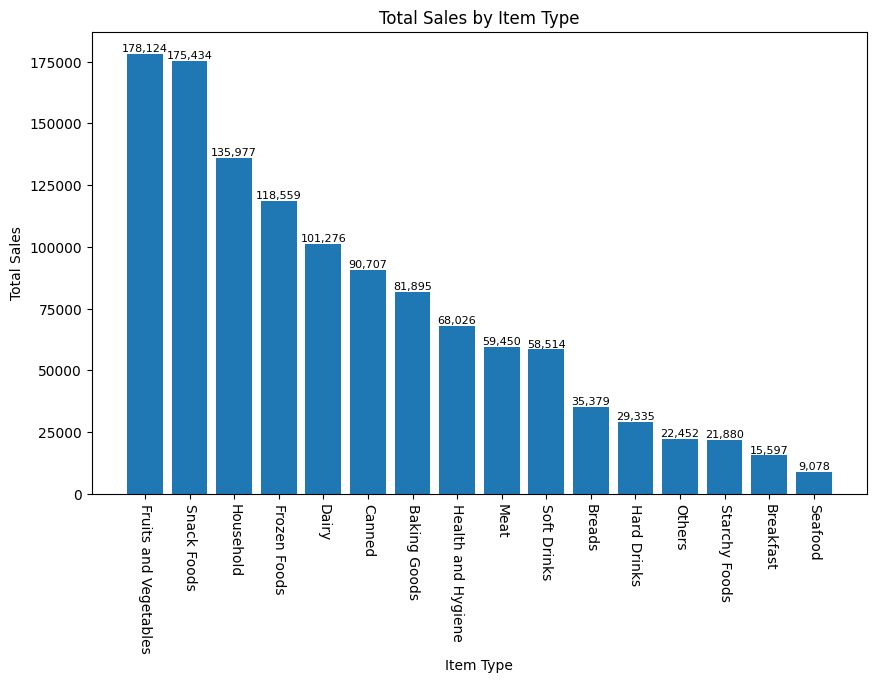

In [155]:
plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index,sales_by_type.values)
plt.xticks(rotation=-90)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Item Type")

#to get the values/labels on the bars
for bar in bars:
    plt.text(bar.get_x()+ bar.get_width() / 2, bar.get_height(),
            f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

plt.show()

In [156]:
#Fat content by outlet for total sales
grouped=data.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]

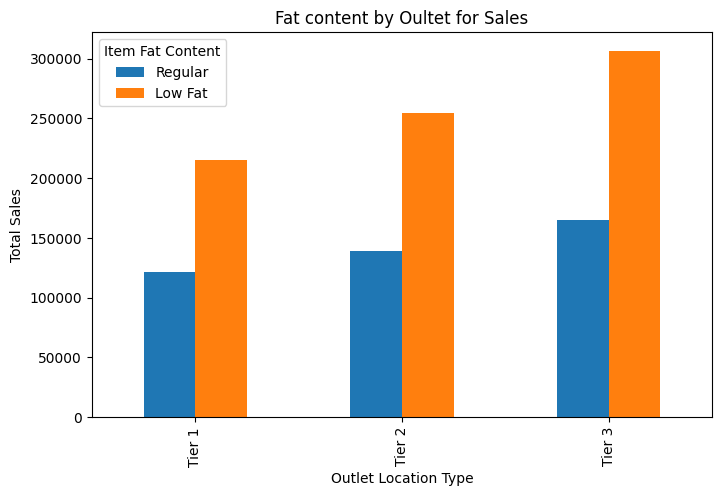

In [157]:
grouped.plot(kind='bar',figsize=(8,5))
plt.title("Fat content by Oultet for Sales")
plt.xlabel("Outlet Location Type")
plt.ylabel("Total Sales")
plt.legend(title="Item Fat Content")

plt.show()

In [158]:
#BY Outlet Establishment
sales_by_establishment=data.groupby("Outlet Establishment Year")['Sales'].sum().sort_index()
sales_by_establishment

Outlet Establishment Year
2011     78131.5666
2012    130476.8598
2014    131809.0156
2015    130942.7802
2016    132113.3698
2017    133103.9070
2018    204522.2570
2020    129103.9604
2022    131477.7764
Name: Sales, dtype: float64

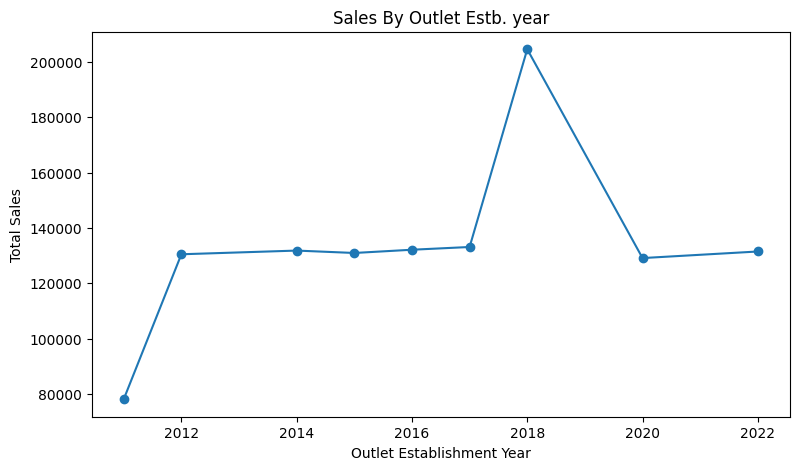

In [159]:
plt.figure(figsize=(9,5))
plt.plot(sales_by_establishment.index,sales_by_establishment.values,marker="o")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")
plt.title("Sales By Outlet Estb. year")
plt.show()

In [160]:
#By Outlet size
sales_by_size=data.groupby('Outlet Size')['Sales'].sum()
sales_by_size

Outlet Size
High      248991.5860
Medium    507895.7364
Small     444794.1704
Name: Sales, dtype: float64

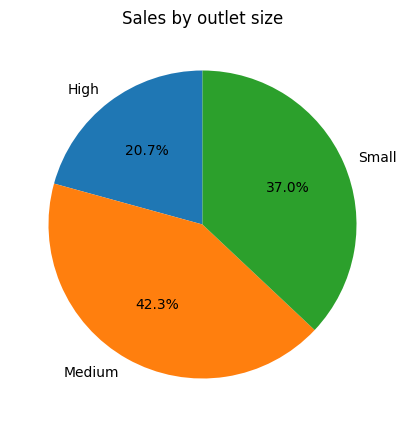

In [161]:
plt.figure(figsize=(5,5))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%',startangle=90)
plt.title('Sales by outlet size')
plt.show()

In [181]:
#By outlet location
sales_by_location=data.groupby("Outlet Location Type")["Sales"].sum().sort_values(ascending=False)
sales_by_location.reset_index() #converted to DataFrame
sales_by_location

Outlet Location Type
Tier 3    472133.0332
Tier 2    393150.6476
Tier 1    336397.8120
Name: Sales, dtype: float64

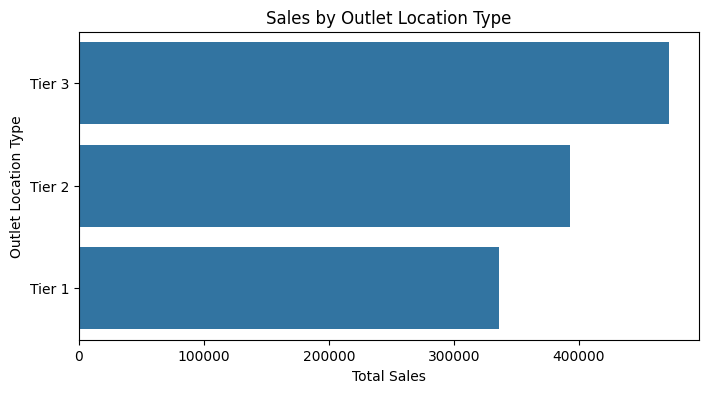

In [182]:
plt.figure(figsize=(8,4))
sns.barplot(x=sales_by_location.values,y=sales_by_location.index)

plt.title("Sales by Outlet Location Type")
plt.xlabel("Total Sales")
plt.ylabel("Outlet Location Type")
plt.show()